In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
path="nhanes_2015_2016.csv"

In [2]:
#Import data
df= pd.read_csv(path)

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.size

160580

In [5]:
df.shape

(5735, 28)

In [25]:
df.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN


In [7]:
#Consider one feature
bp=df['BPXSY2']

In [8]:
bp_mean=bp.mean()
bp_mean #Nan Values are not taking into account

124.78301716350497

In [9]:
#Let's remove the missing values
bp=bp.dropna()

In [10]:
print("median=",bp.median()," Max=", bp.max()," Min=", bp.min(), " SDev=", bp.std(), " Var=",bp.var())

median= 122.0  Max= 238.0  Min= 84.0  SDev= 18.527011720295047  Var= 343.25016328395003


In [11]:
diff_by_series_method=bp.diff()

In [12]:
diff_by_series_method.values

array([ nan,  16.,  -8., ...,  30., -40.,   8.])

In [13]:
diff_by_series_method.shape

(5535,)

In [14]:
diff_by_np_method=np.diff(bp)
diff_by_np_method

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [15]:
bp.values

array([124., 140., 132., ..., 146., 106., 114.])

In [16]:
diff_arr=[]
for i in range(len(bp.values)-1):
    diff=bp.values[i+1]-bp.values[i]
    diff_arr.append(diff)
np.array(diff_arr)

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [17]:
#Interquartile range
bp_iqr=stats.iqr(bp)
bp_iqr

22.0

In [18]:
bp_descriptive_stats=bp.describe()
bp_descriptive_stats

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Blood pressure in mm/Hg'),
 Text(0.5, 1.0, 'Distribution')]

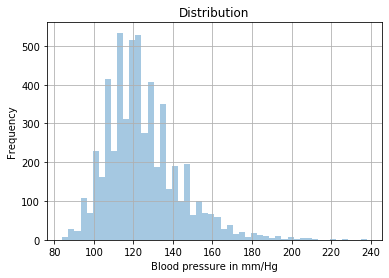

In [23]:
p=sns.distplot(bp,kde=False)
p.grid()
p.set(title='Distribution',xlabel="Blood pressure in mm/Hg",ylabel='Frequency')

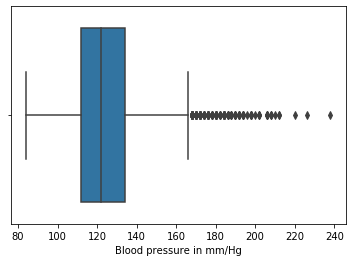

In [21]:
ax=sns.boxplot(bp)
_=ax.set_xlabel("Blood pressure in mm/Hg")